In [72]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import skewnorm
%matplotlib inline

# Define helper functions

In [101]:
def describe(data):
    print ("mean = %4.4f" %(data.mean()))
    print ("standard deviation = %4.4f" %(data.std()))
    print ("skewness = %4.4f" %(stats.skew(data)))
    print ("kurtosis = %4.4f" %(stats.kurtosis(data)))

def generate_normal_sample(mean= 0, std = 1, n = 1000):
    measurements = np.random.normal(loc=mean,scale=std,size=n)
    return measurements

def add_outlier(data, prct_outlier=0.1, threshold=3):
    new_data = data.copy()
    mean = new_data.mean()
    std = new_data.std()
    #define outlier as value>mean+3*std or value<mean-3*std
    
    right_outliers = mean + threshold*std + np.random.normal(loc=0,scale=1,
                                                     size=int(len(data)*prct_outlier))
    left_outliers = mean - threshold*std + np.random.normal(loc=0,scale=1,
                                                 size=int(len(data)*prct_outlier))
    
    #new_data.append(right_outliers)
    new_data = np.append(new_data, right_outliers)
    new_data = np.append(new_data, left_outliers)
    #new_data.append(left_outliers)
    
    return new_data

mean = 0.0144
standard deviation = 0.9632
skewness = 0.0654
kurtosis = 0.0788


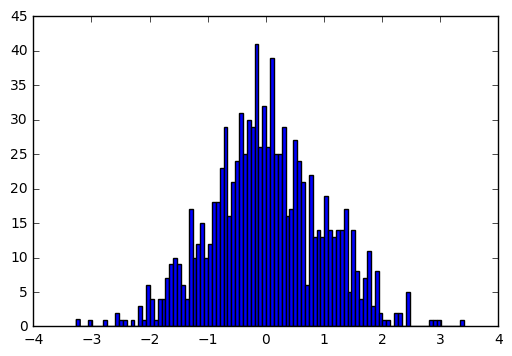

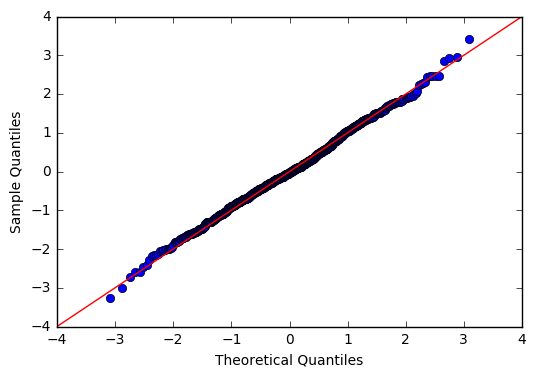

In [88]:
# Normal sample
measurements = generate_normal_sample()
describe(measurements)
plt.hist(measurements, bins = 100)
sm.qqplot(measurements, line="45");

mean = 0.0363
standard deviation = 1.2841
skewness = -0.0501
kurtosis = 1.3610


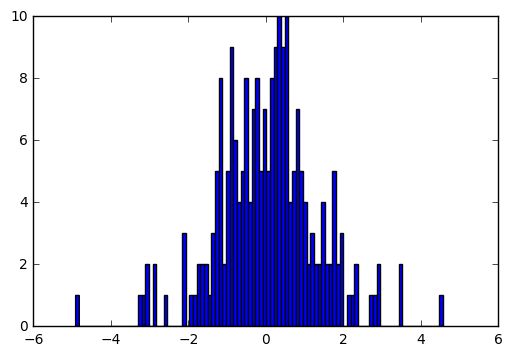

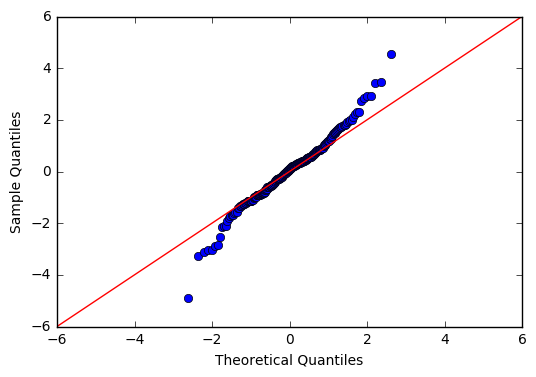

In [106]:
measurements = generate_normal_sample(n=200)
data_with_outlier = add_outlier(measurements, prct_outlier=0.05, threshold=3)
describe(data_with_outlier)

plt.hist(data_with_outlier, bins = 100)
sm.qqplot(data_with_outlier, line="45");

mean = 0.8927
standard deviation = 0.6778
skewness = 0.8664
kurtosis = 0.5799


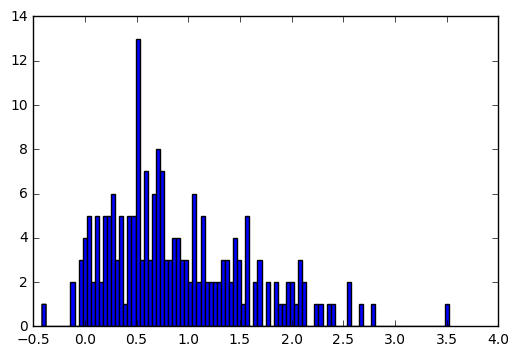

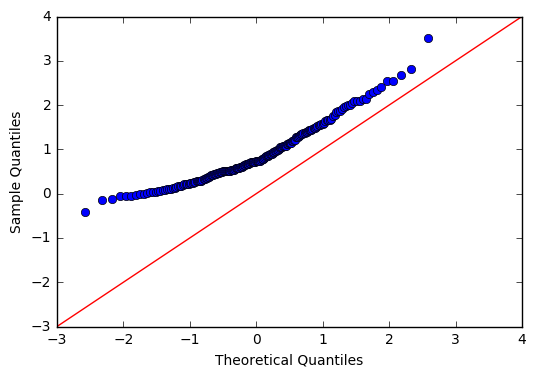

In [95]:
#right skewed data
skewed_data = skewnorm.rvs(6, size=200);
describe(skewed_data);
plt.hist(skewed_data, bins=100);
sm.qqplot(skewed_data, line="45");

mean = -0.8254
standard deviation = 0.6280
skewness = -0.7725
kurtosis = 0.2643


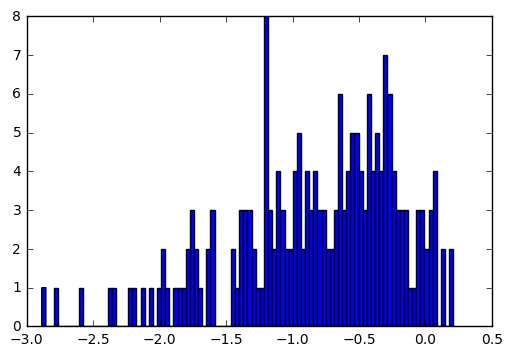

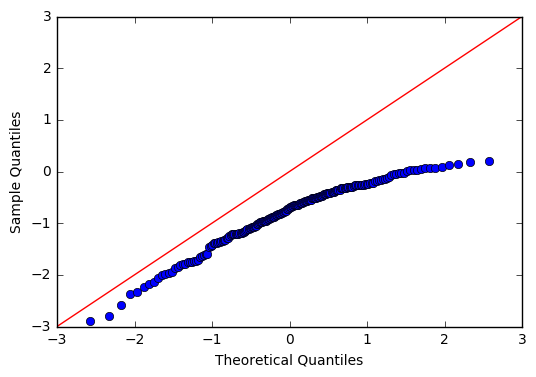

In [96]:
#left skewed data
skewed_data = skewnorm.rvs(-6, size=200);
describe(skewed_data);
plt.hist(skewed_data, bins=100);
sm.qqplot(skewed_data, line="45");